In [1]:
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
random_state = 10 # Ensure reproducible results
%matplotlib inline
plt.style.use('ggplot')

# Flying to New York City - Raw Data Preprocess

### Do not execute the following code!

Read the data from csv files and concatenate them to data framework


In [2]:
all_pandas = []
for i in range(1,13):
    path_data = os.path.join(os.getcwd(), 'DME_data', '78448857_T_ONTIME_2016_'+str(i)+'.csv')
    data_full = pd.read_csv(path_data, delimiter = ',',index_col=None, header=0)
    all_pandas.append(data_full)
data_frame = pd.concat(all_pandas)

In [3]:
print("There are {} entries and {} columns in the landsat_train DataFrame"\
      .format(data_frame.shape[0], data_frame.shape[1]))

There are 492181 entries and 40 columns in the landsat_train DataFrame


In [4]:
data_frame = data_frame.drop('Unnamed: 39',1)

In [21]:
data_frame.to_csv('raw_data.csv',sep=",",)

### Execute the following code to load the raw data

Read the raw data and pass it to pandas framework. Please remember to drop the collumn "Unnamed: 0" (Some weird collumn the csv is passing to the data, it has nothing to do with the real data).

In [2]:
path_data = os.path.join(os.getcwd(),'raw_data.csv')
df = pd.read_csv(path_data, delimiter = ',')
df = df.drop('Unnamed: 0',1)

In [3]:
print("There are {} entries and {} columns in the landsat_train DataFrame"\
      .format(df.shape[0], df.shape[1]))

There are 492181 entries and 39 columns in the landsat_train DataFrame


These are the features that I downloaded. Some of them are unnecessary. Read the Readme.csv and Terms.csv files to know more about each feature.

In [4]:
df.dtypes

YEAR                     int64
QUARTER                  int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
FL_DATE                 object
UNIQUE_CARRIER          object
AIRLINE_ID               int64
CARRIER                 object
FL_NUM                   int64
ORIGIN_AIRPORT_ID        int64
ORIGIN                  object
ORIGIN_CITY_NAME        object
ORIGIN_STATE_ABR        object
ORIGIN_STATE_NM         object
DEST_AIRPORT_ID          int64
DEST                    object
DEST_CITY_NAME          object
DEST_STATE_ABR          object
DEST_STATE_NM           object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
DEP_DELAY_NEW          float64
DEP_DEL15              float64
DEP_DELAY_GROUP        float64
DEP_TIME_BLK            object
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
ARR_DELAY_NEW          float64
ARR_DEL15              float64
ARR_DELA

### Cancelled Flights

There are 8949 cancelled flights out of 483232: 1.85190550295 %


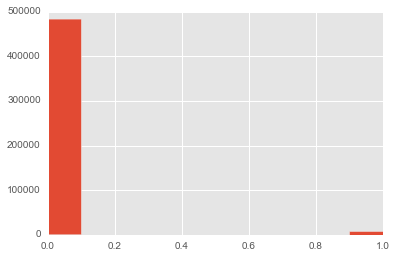

In [9]:
plt.hist(df['CANCELLED'].values)
count=0
count_c=0
for v in df['CANCELLED'].values:
    if v==1.0:
        count_c +=1
    else:
        count +=1
print ("There are {} cancelled flights out of {}: {} %".format(count_c,count, (100*count_c)/count))

### Number and percentage of nulls per feature and per row

In [25]:
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
FL_DATE                    0
UNIQUE_CARRIER             0
AIRLINE_ID                 0
CARRIER                    0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
ORIGIN_CITY_NAME           0
ORIGIN_STATE_ABR           0
ORIGIN_STATE_NM            0
DEST_AIRPORT_ID            0
DEST                       0
DEST_CITY_NAME             0
DEST_STATE_ABR             0
DEST_STATE_NM              0
CRS_DEP_TIME               0
DEP_TIME                8557
DEP_DELAY               8557
DEP_DELAY_NEW           8557
DEP_DEL15               8557
DEP_DELAY_GROUP         8557
DEP_TIME_BLK               0
CRS_ARR_TIME               0
ARR_TIME                9191
ARR_DELAY              10519
ARR_DELAY_NEW          10519
ARR_DEL15              10519
ARR_DELAY_GROUP        10519
CANCELLED                  0
CRS_ELAPSED_TI

In [28]:
feature_number = df.count()
(100 * df.isnull().sum()) / df.count()

YEAR                   0.000000
QUARTER                0.000000
MONTH                  0.000000
DAY_OF_MONTH           0.000000
DAY_OF_WEEK            0.000000
FL_DATE                0.000000
UNIQUE_CARRIER         0.000000
AIRLINE_ID             0.000000
CARRIER                0.000000
FL_NUM                 0.000000
ORIGIN_AIRPORT_ID      0.000000
ORIGIN                 0.000000
ORIGIN_CITY_NAME       0.000000
ORIGIN_STATE_ABR       0.000000
ORIGIN_STATE_NM        0.000000
DEST_AIRPORT_ID        0.000000
DEST                   0.000000
DEST_CITY_NAME         0.000000
DEST_STATE_ABR         0.000000
DEST_STATE_NM          0.000000
CRS_DEP_TIME           0.000000
DEP_TIME               1.769350
DEP_DELAY              1.769350
DEP_DELAY_NEW          1.769350
DEP_DEL15              1.769350
DEP_DELAY_GROUP        1.769350
DEP_TIME_BLK           0.000000
CRS_ARR_TIME           0.000000
ARR_TIME               1.902938
ARR_DELAY              2.183897
ARR_DELAY_NEW          2.183897
ARR_DEL1

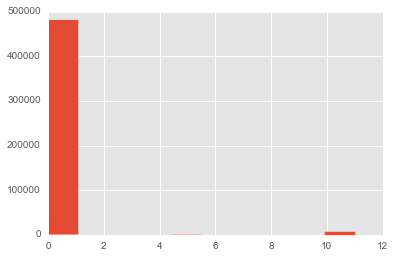

In [62]:
plt.hist(df.isnull().sum(axis=1))
x = df.isnull().sum(axis=1)

### Unique values per feature

In [46]:
for column in df:
    print('\n'+ column + ': ')
    if (len(df[column].unique()) < 150):
        print(df[column].unique())
    else:
        print('Too large to show')
    
    


YEAR: 
[2016]

QUARTER: 
[1 2 3 4]

MONTH: 
[ 1  2  3  4  5  6  7  8  9 10 11 12]

DAY_OF_MONTH: 
[ 4  5  6  7 16 17 18  2 12 13 14 15 24 25 26 27 21 22 23  1  3  8  9 10 11
 20 19 30 31 28 29]

DAY_OF_WEEK: 
[1 2 3 4 6 7 5]

FL_DATE: 
Too large to show

UNIQUE_CARRIER: 
['F9' 'HA' 'DL' 'NK' 'EV' 'OO' 'UA' 'VX' 'AA' 'AS' 'B6' 'WN']

AIRLINE_ID: 
[20436 19690 19790 20416 20366 20304 19977 21171 19805 19930 20409 19393]

CARRIER: 
['F9' 'HA' 'DL' 'NK' 'EV' 'OO' 'UA' 'VX' 'AA' 'AS' 'B6' 'WN']

FL_NUM: 
Too large to show

ORIGIN_AIRPORT_ID: 
[13303 12953 10397 12173 11433 10423 15304 15024 14107 11697 10994 10792
 11292 13204 14747 14683 11298 12892 14869 12889 14027 14576 12478 14679
 13495 10257 10721 14524 14843 14771 13930 13577 12265 12197 14025 15096
 11618 12397 10577 12266 13502 11259 14262 11278 11057 14122 11503 14100
 15070 12451 12954 12191 14831 14254 10732 14685 14492 14057 12264 14635
 10785 14321 10140 14570 14893 14986 13796 10800 11252 13487 10693 10821
 12339 12391 1501